# 20186795 한동민 HW 12

In [27]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn
patch_sklearn()



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [29]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [30]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [31]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [32]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [33]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

msc = MinMaxScaler()
std = StandardScaler()
data1 = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)
data2 = pd.DataFrame(std.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [34]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data_msc = data1[x_cols]
X_data_std = data2[x_cols]
y_data = data1['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [41]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y_data == predict) / float(real.shape[0])

In [44]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [90]:

def search_K(x_data, _p):
    score_k = []
    score_acc = []
    for k in range(1, 21):
        
        knn = KNeighborsClassifier(n_neighbors=k, p = _p)
        knn = knn.fit(x_data, y_data)
        
        y_pred = knn.predict(x_data)
        score = accuracy(y_data, y_pred)
        if k == 6:
            print(score[4])
        score_k.append(k)
        score_acc.append(score)
        
    plt.plot(score_k, score_acc)

0.9216
0.9152
0.9156
0.9094


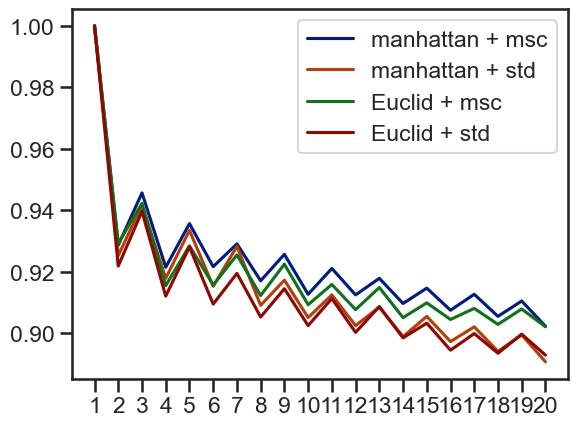

In [92]:
search_K(X_data_msc, 1)
search_K(X_data_std, 1)
search_K(X_data_msc, 2)
search_K(X_data_std, 2)
plt.legend(['manhattan + msc', 'manhattan + std' , 'Euclid + msc' , 'Euclid + std' ])
plt.xticks(range(1,21))
plt.show()

### 1. MinMaxScaler
* MinMaxScaler를 채택한 경우, K = 5 라면
manhattan : 0.9216
Euclid : 0.9156
결과를 확인하면 manhattan 결과가 우수한 것을 확인할 수 있다.

### 2. StandardScaler
* StandardScaler 채택한 경우, K = 5 라면
manhattan : 0.9152
Euclid : 0.9094
결과를 확인하면 manhattan 결과가 우수한 것을 확인할 수 있다.

### 3. 3가지 주요 고려사항를 고려한 다양한 실험 결과를 분석하고, Reasoning을 제시하시오 
* K_value :  평균적으로 K가 커질수록 acc는 감소하는 것을 확인할 수 있다.
* distance : (K <= 7)까지 scaler 방식과 상관없이 Manhattan이 우수한 것을 확인할 수 있으며 이후 k가 커질수록 둘의 방식에 대한 차이는 작아지며, scaler방식의 차이가 커지는 것을 확인할 수 있다.
* scaler : (k <= 7)까지 방식의 차이가 뚜렷하진 않으나, 7이후부터는 msc방식이 우수한 것을 확인할 수 있다.

* 가장 우수한 조합 : K 는 작을수록, (manhattan + MinMaxScaler)
* 가장 안좋은 조합 : K 는 클수록, (Euclid + StandardScaler)